# Walmart Sales Forecast
This notebook explores the sales data of 45 Wal-Mart locations. Exploritory data analysis was perfomed at the store and deparment level and the finding were used to forecast the sales.

    Functionality Setting

In [1]:
import warnings
warnings.filterwarnings("ignore")

    Dependencies

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import datetime

# 1. Data Imports
The sales and store data was collected from [Walmart Recruiting's Kaggle Competition](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting). This dataset only includes the influence of 4 holidays. Entering this project with the assumption that consumer spending is heavily influenced by holidays so a [second source](https://www.timeanddate.com/holidays/us/2010?hol=17) was utilized to collect all relevant consumer events and commonly observed U.S. holidays. The datasets were then consolidated in a [separate script](https://github.com/octaviaisom/Walmart-Sales-Forecast/blob/master/holidates.py) (due to its extended runtime) and saved in ``` sales_updated.csv ```.

In [3]:
csv = pd.read_csv("data/sales_updated.csv")
sales = pd.DataFrame(csv)

sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,9/28/2012,508.37,False
421566,45,98,10/5/2012,628.10,False
421567,45,98,10/12/2012,1061.02,False
421568,45,98,10/19/2012,760.01,False
421569,45,98,10/26/2012,1076.80,False


In [4]:
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
sales.Date = pd.to_datetime(sales.Date)

In [6]:
csv = pd.read_csv("data/stores.csv")
stores = pd.DataFrame(csv)

stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [7]:
stores.info()
stores.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [8]:
csv = pd.read_csv("data/holidays.csv")
holidays = pd.DataFrame(csv)

holidays.head()

,Holiday,Date
0,Black Friday,2010-11-26
1,Black Friday,2011-11-25
2,Black Friday,2012-11-23
3,Black Friday,2013-11-29
4,Christmas Day,2010-12-25


In [9]:
holidays.Date = pd.to_datetime(holidays.Date)

# 2. EDA

In [80]:
#setting color pallete for charts
palette = flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(palette)

## Record Counts
Review missing values

In [81]:
sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [82]:
45*81*143 == len(sales)

False

In [83]:
#Departments with missing weekly sales
sales.groupby('Dept').nunique().query("Date<143")

,Store,Dept,Date,Weekly_Sales,IsHoliday
Dept,,,,,
39,5,1,16,12,2
43,5,1,12,6,2
47,37,1,138,277,2
51,37,1,131,780,2
77,37,1,35,58,2
78,37,1,82,38,2
99,37,1,94,311,2


In [84]:
#Stores with missing weekly sales
sales.groupby('Store').nunique().query("Date<143")

,Store,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,,


In [85]:
#Number of unique depts per store
sales.groupby('Store').nunique().sort_values(['Dept'])

,Store,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,,
43,1,61,143,6292,2
37,1,62,143,6864,2
42,1,62,143,6452,2
44,1,62,143,6548,2
33,1,63,143,5714,2
36,1,63,143,5742,2
38,1,63,143,6715,2
30,1,64,143,6517,2
3,1,72,143,8688,2


## Sales Analysis
High-level analysis of sales and holiday's potential influence on seasonality

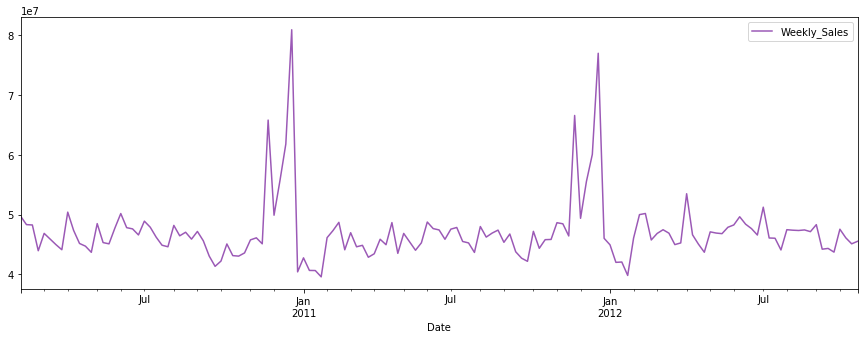

In [86]:
#Total weekly sales
byDate = sales.groupby('Date',sort=False).sum()
byDate.plot(y='Weekly_Sales', figsize=(15,5))

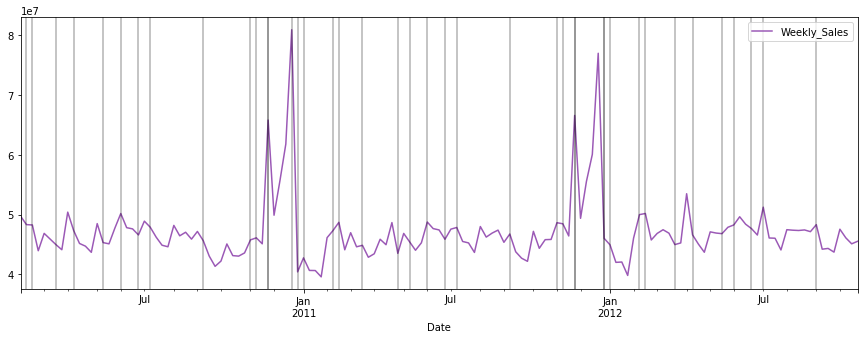

In [87]:
#Total weekly sales with holiday markers
final_wk = max(byDate.index)
ax = byDate.plot(y='Weekly_Sales', figsize=(15,5))

for index, row in holidays[holidays.Date <= final_wk].iterrows():
    holiday = row['Date']
    ax.axvline(x=holiday, c='k', alpha = 0.3)

Day-of and trailing/leading

# Sales by Store
How does the stores' size/type influences sales?

In [88]:
byStore = sales.reset_index().groupby('Store', as_index=False).sum()
byStore = pd.merge(byStore, stores, on='Store', how='left')
byStore.head()

,Store,index,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,52464646,454749,2.224028e+08,2724.0,A,151315
1,2,157281275,455425,2.753824e+08,2727.0,A,202307
2,3,225895482,370825,5.758674e+07,2410.0,B,37392
3,4,355960752,457340,2.995440e+08,2738.0,A,205863
4,5,398556711,371526,4.547569e+07,2397.0,B,34875


In [89]:
byStore.nunique()

Store           45
index           45
Dept            45
Weekly_Sales    45
IsHoliday       45
Type             3
Size            40
dtype: int64

In [90]:
#Formatting df for visuals
byStore = byStore[["Store", "Weekly_Sales", "Type", "Size"]]
byStore.head()

,Store,Weekly_Sales,Type,Size
0,1,2.224028e+08,A,151315
1,2,2.753824e+08,A,202307
2,3,5.758674e+07,B,37392
3,4,2.995440e+08,A,205863
4,5,4.547569e+07,B,34875


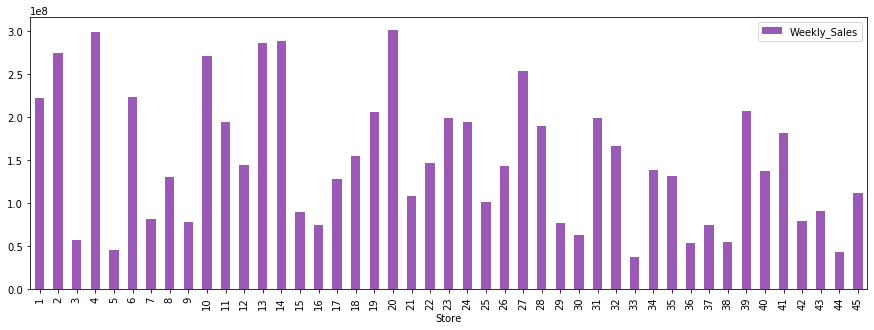

In [91]:
#Total sales for the entire period
byStore.plot(x='Store',y='Weekly_Sales',kind='bar',figsize=(15,5))

SOME STORE THAT OUTPERFORM OTHERS...POTENTIALLY INFLUENCED BY Type SIZE LOCATION ETC...

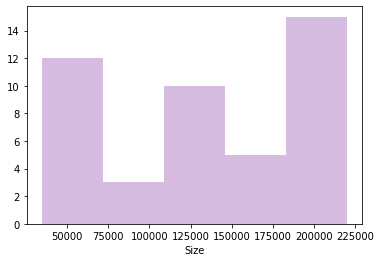

In [97]:
sns.distplot(byStore['Size'], kde=False, bins=5)

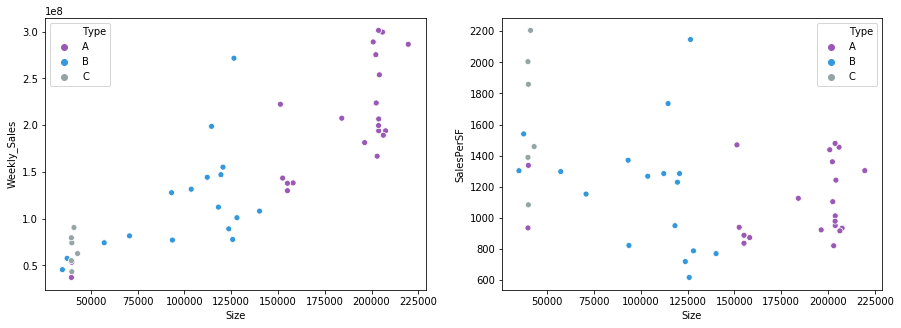

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x='Size',y='Weekly_Sales',data=byStore, hue='Type', ax=ax1)

byStore["SalesPerSF"] = byStore['Weekly_Sales']/byStore['Size']
sns.scatterplot(x='Size',y='SalesPerSF',data=byStore, hue='Type', ax=ax2)

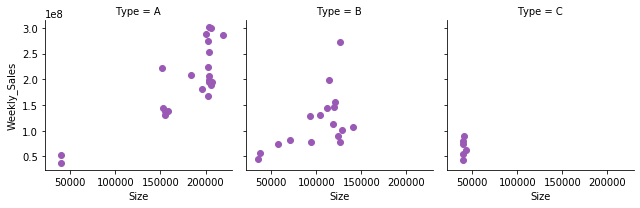

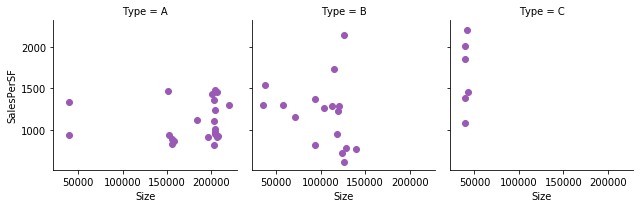

In [112]:
#Size vs Weekly Sales and Sales per Sq. Ft.
fgrid = sns.FacetGrid(data=byStore, col='Type')
fgrid.map(plt.scatter,'Size', 'Weekly_Sales')

#Size vs Weekly Sales and Sales per Sq. Ft.
fgrid = sns.FacetGrid(data=byStore, col='Type')
fgrid.map(plt.scatter,'Size', 'SalesPerSF')

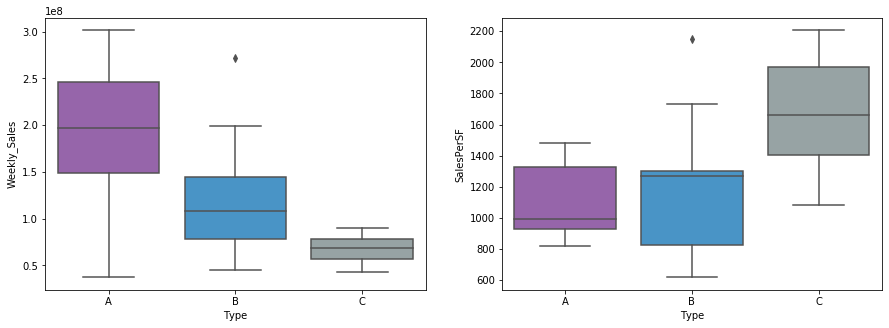

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x='Type', y='Weekly_Sales', data=byStore, ax=ax1)
sns.boxplot(x='Type', y='SalesPerSF', data=byStore, ax=ax2)

types seem to be based soley on size....smaller store making best use of space...larger store appear to be average ....medium have lowest performance

...type influenced by size...bc previous does not provided the desired detail...dig deeper into size..cluster to further analyze the sales behavior across stores SIZES...

Cluster Stores
in hope to find stronger relationships...use ml to cluter store based on size

In [117]:
byStorex = byStore[['Weekly_Sales', 'Size','SalesPerSF']]
byStorex.head()

,Weekly_Sales,Size,SalesPerSF
0,2.224028e+08,151315,1469.800144
1,2.753824e+08,202307,1361.210640
2,5.758674e+07,37392,1540.081704
3,2.995440e+08,205863,1455.064550
4,4.547569e+07,34875,1303.962406


In [118]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6) #Based on the distinct clustering in the above $/sf graph
kmeans.fit(byStorex)
byStorex['Cluster'] = kmeans.labels_
byStorex.head()

,Weekly_Sales,Size,SalesPerSF,Cluster
0,2.224028e+08,151315,1469.800144,1
1,2.753824e+08,202307,1361.210640,2
2,5.758674e+07,37392,1540.081704,4
3,2.995440e+08,205863,1455.064550,2
4,4.547569e+07,34875,1303.962406,4


NOW THAT THE STORE ARE CLUSTERED...MORE MEANINGFUL inferences...size's influence on sales

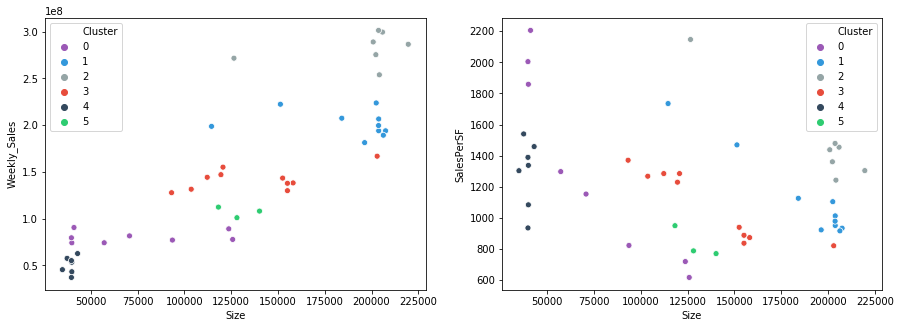

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x='Size',y='Weekly_Sales',data=byStorex, hue='Cluster', ax=ax1, palette=palette)
sns.scatterplot(x='Size',y='SalesPerSF',data=byStorex, hue='Cluster', ax=ax2, palette=palette)

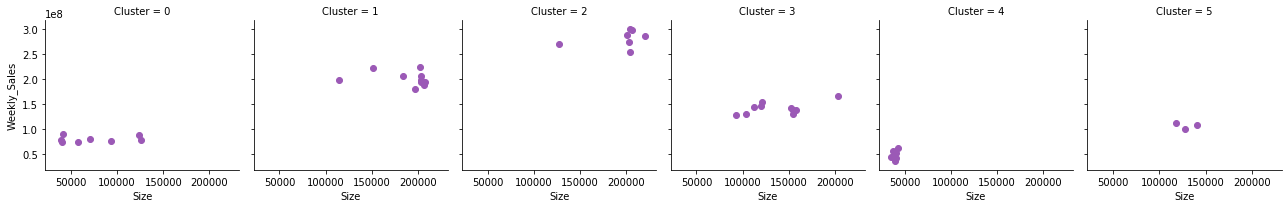

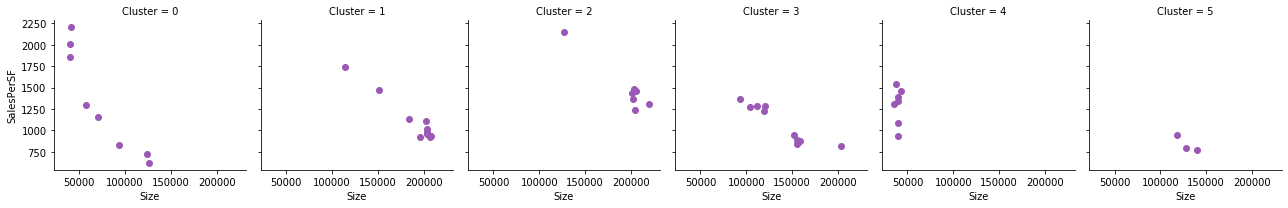

In [122]:
fgrid = sns.FacetGrid(data=byStorex, col='Cluster')
fgrid.map(plt.scatter,'Size', 'Weekly_Sales')

fgrid = sns.FacetGrid(data=byStorex, col='Cluster')
fgrid.map(plt.scatter,'Size', 'SalesPerSF')

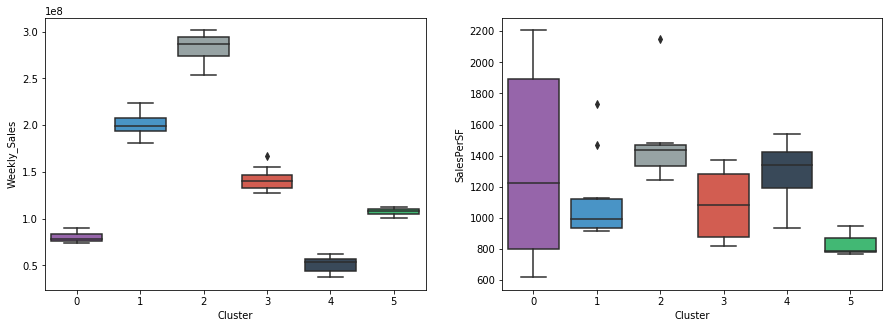

In [123]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x='Cluster', y='Weekly_Sales', data=byStorex, ax=ax1)
sns.boxplot(x='Cluster', y='SalesPerSF', data=byStorex, ax=ax2)

FINAL STORE SALES THOUGHTS...

# Sales by Dept
Which departments are influenced by seasonality?

In [107]:
#number of departments
sales['Dept'].nunique()

81

COMPARE ALL BAR

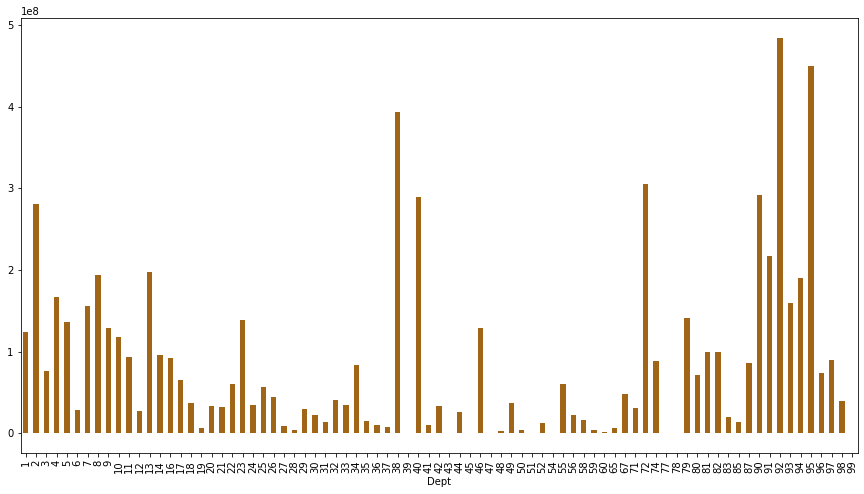

In [38]:
byDept = sales.groupby(['Dept']).sum()
byDept['Weekly_Sales'].plot(kind='bar',figsize=(15,8))

negative sales (loss) observed...filter store with negative sales

In [39]:
byDept.query('Weekly_Sales<=0')

,Store,Weekly_Sales,IsHoliday
Dept,,,
47,12641,-4962.93,187.0


In [40]:
byDept.loc[47]['Weekly_Sales']/byDept['Weekly_Sales'].sum()

-7.366437115218221e-07

DICKEY-FULLER TEST

In [41]:
LOOP THROUGHT DEPT AND ASSIGN STATIONARITY ...THIS WILL DETERMINE HOW THE DEPTS ARE LATER FORESCASTED

SyntaxError: invalid syntax (<ipython-input-41-42c81f034d14>, line 1)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
csv = pd.read_csv("data/sales.csv")
salesx = pd.DataFrame(csv)
#salesx.reset_index(inplace=True)
#salesx.set_index('Date', inplace=True)
salesx.index.freq = 'W'
salesx.head()

In [ ]:
salesx.query("Dept==96")

In [ ]:
salesx.groupby(['Store']).nunique().sort_values(['Weekly_Sales'])

In [ ]:
pd.set_option('display.max_rows', 600)
x = salesx.groupby(['Store','Dept']).nunique()
x

In [ ]:
x.query("Weekly_Sales<143")

In [ ]:
pd.set_option('display.max_rows', 500)
salesx.groupby(['Dept']).nunique().sort_values(['Weekly_Sales'])

In [ ]:
pd.set_option('display.max_rows', 500)
x = salesx.groupby(['Dept']).nunique()
x.query("Store<45|Date<143").sort_values(['Date','Store'])

In [ ]:
salesx.iloc[[1,2,3]]

In [ ]:
depts = salesx['Dept'].unique()
salesx['Stationarity'] = ""
for dept in depts:
    dept_sales = salesx.query(f"Dept=={dept}")
    indices = dept_sales['index'].unique()
    dftest = adfuller(dept_sales['Weekly_Sales'],autolag='AIC')
    p_value = dftest[1]

    if p_value <= 0.05:
        stationarity = 1 #stationary
    else:
        stationarity = 0 #non-stationary
        
    salesx['Stationarity'].iloc[indices] = stationarity

In [ ]:
statCount = salesx.groupby(['Stationarity',"Dept"]).sum()
statCount
#percent of sales??

In [ ]:
salesx.query("Dept==1").groupby("Date").sum().plot(y="Weekly_Sales")

In [ ]:
dept=96
dept_sales = salesx.query(f"Dept=={dept}")
dept_sales.head()

In [ ]:
dftest = adfuller(dept_sales['Weekly_Sales'],autolag='AIC')
p_value = dftest[1]

if p_value <= 0.05:
    stationarity = 1 #stationary
else:
    stationarity = 0 #non-stationary

stationarity

STATIONARY VS NON-STATIONARY...COUNT, %OF DEPT, %OF SALES DEPEND ON SEASONALITY/TRENDS??

In [ ]:
#GRID CHART????

# 3. Forecasting
describe methodology..stationarity/DFT results determine model type(ARIMA or SARIMAx)...Eget felis eget nunc lobortis mattis. Vulputate sapien nec sagittis aliquam malesuada bibendum. Adipiscing tristique risus nec feugiat in fermentum posuere urna. Sapien pellentesque habitant morbi tristique senectus et netus. Faucibus scelerisque eleifend donec pretium vulputate sapien nec. Eget egestas purus viverra

In [ ]:
#GROUP BY DEPTS OR SPLIT DATA?

original data only include...incorporae all US consumer spending event (super bowl, black friday) and other commonly observed holdays that would drive consumer spending...assuming all us stores!!!!
back to school...no exact date???

SOME HOLIDAYS HAVE TRAILING SALES (PREPARE)...SOME SAME DAY...